<div align="right">Revision 1 : October 2022</div>

<a href="https://colab.research.google.com/github/dewdotninja/control_python/blob/master/exercises/cascaded_pid_implement_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left">
<img src="https://raw.githubusercontent.com/dewdotninja/exams/main/feng_heading_en.png" width=400 alt="Feng heading"/>
</p>

#### Department of Mechanical Engineering


### Exercise: discrete cascaded PID controllers implementation

(10 points) Simulate step response the cascaded PID feedback in Homework 4 and compare with the continuous-time result.
They should match well.


In [ ]:
# You need to install these libraries in the Colab environment
!pip install control

In [2]:
# import libraries you want to use
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

**Note :** Some parameters in this notebook depends on random variables <code>rand_x, rand_y, rand_z</code> below. This makes 
the exercise different each time you run it.

In [ ]:
rand_x = np.random.randint(1,9)
rand_y = np.random.randint(1,9)
rand_z = np.random.randint(1,9)

### Robot joint with HDM plant
One device commonly used in industrial machines with rotary motion, such as robotic joints, is called a Harmonic Drive from a group of companies Harmonic Drive LLC. motor Hereafter, for the convenience of writing, it is abbreviated as the HDM system.

Figure 1 shows the structure of the HDM mechanism consisting of three parts: a circular spline, a flexspline, and an elliptical wave generator. The wave generator is connected to the shaft of a motor that rotates at high speed. A round ring has teeth inside. Between the two are separated by an elastic ring with teeth on the outside.

<p align="center">
<img src="https://drive.google.com/uc?id=1PtcGtTJ2iv81nLHz5Gb5mNnGeM_d5i4c" width=300 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 HDM structure (https://www.harmonicdrive.net/)</b></div>

When drawing a schematic diagram of the HDM device connected to the DC motor, it will be shown in Figure 2. Left side is the motor's electrical system. and on the right is the mechanical system of the harmonic drive, represented by a soft shaft thru-axle gearbox with a hardness of k.

<p align="center">
<img src="https://drive.google.com/uc?id=1OP3LsMAgsHQ5uYdmVLQFHQLq55J-kYd7" width=550 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 HDM block diagram </b></div>

Define
$$
p_l(s) = J_ls^2 + B_ls + k \tag{1}
$$
$$
p_m(s) = J_ms^2 + B_ms + k \tag{2}
$$
Overall transfer function of HDM can be described as 
$$
P(s) = \frac{\theta_l(s)}{V(s)} = \frac{k_mk}{p_m(s)p_l(s)(Ls+R)-k^2(Ls+R)+rk_mk_bsp_l(s)} \tag{3}
$$
assign parameter values (with x, y, z from your student ID)

```python
km = (rand_y+rand_z)*100  # torque constant
kb = 1  # back EMF constant
k = 1000 # torsional stiffness of harmonic drive
r = rand_x   # gear ratio
R = 1  # armature resistance
L = 0.1 # armature inductance
Jm = (rand_x+rand_y)  #  motor inertia
Bm = 0.01*rand_y  # motor shaft friction
Jl = (rand_x+rand_z)  # load inertia
Bl = 0.01*rand_z  # load friction
```
Write code to create a plant transfer function of HDM as in (3) 

#### Copy your solution from previous exercise

In [5]:
km = (rand_y+rand_z)*100  # torque constant
kb = 1  # back EMF constant
k = 1000 # torsional stiffness of harmonic drive
r = id_x   # gear ratio
R = 1  # armature resistance
L = 0.1 # armature inductance
Jm = (rand_x+rand_y)  #  motor inertia
Bm = 0.01*rand_y  # motor shaft friction
Jl = (rand_x+rand_z)  # load inertia
Bl = 0.01*rand_z  # load friction	
s = ctl.tf("s")
p_l = Jl*s**2 + Bl*s + k
p_m = Jm*s**2 + Bm*s + k
P = km*k/(p_m*p_l*(L*s+R) - (k**2)*(L*s+R) + r*km*kb*s*p_l)
P

TransferFunction(array([1300000]), array([7.00000000e+00, 7.01060000e+01, 2.77010604e+04, 1.72210040e+04,
       2.60013000e+06, 0.00000000e+00]))

#### Result from previous exercise

Figure 3 shows cascaded PID structure (for a robot joint driven by simple 
DC motor) to improve closed-loop performance.  

<p align="center">
<img src="https://drive.google.com/uc?id=1fFEOuN7Fh2S1ED3eu6BU6bAFi2EOd6hj" width=650 alt="Figure 4"/>
</p>
<div align="center"><b>Figure 3 cascaded PID control</b></div>

Extract the integrator from the HDM plant above to use it in the outer loop 
as shown in Figure 3. The rest of the plant transfer function is in the inner-loop. For both 
loops, use the following PID equation 

$$
C(s) = K_p + \frac{K_i}{s} + \frac{NK_d}{N/s+1}
$$

***

**P1** (10 points)

Implement the discrete cascaded PID controllers from 
[cascaded PID exercise](https://github.com/dewdotninja/control_python/blob/main/exercises/cascaded_pid_exercise.ipynb). Some of the code such as plant simulation is 
provided for you. Just fill in the missing code.

#### Solution

Create a PID function to be used in simulation.

In [6]:
def PID(kp, ki,kd,N):
    s = ctl.tf("s")
    C = kp + ki/s + kd*s*N/(s+N)
    return C

Consider the HDM plant from P1. Factorize it as 
$$
P(s) = P_{inner}(s)\frac{1}{s}
$$
So can find $P_{inner}(s)$ from
$$
P_{inner}(s) = sP(s)
$$

In [7]:
P_inner = ctl.minreal(s*P)
P_inner

1 states have been removed from the model


TransferFunction(array([185714.28571429]), array([1.00000000e+00, 1.00151429e+01, 3.95729434e+03, 2.46014343e+03,
       3.71447143e+05]))

Construct cascaded PID to simulate the response. Use PID parameters achieved from Homework 4. 
(If you are 
unsuccessful with that homework, simply  use a set of parameters that yields closed-loop stability and decent 
step response.)

In [8]:
# change these parameters
Kp1 = 2.3
Ki1 = 0.8
Kd1 = 0.6
N1 = 20
Kp2 = 1.6
Ki2 = 1.3
Kd2 = 0.1
N2 = 20

0 states have been removed from the model


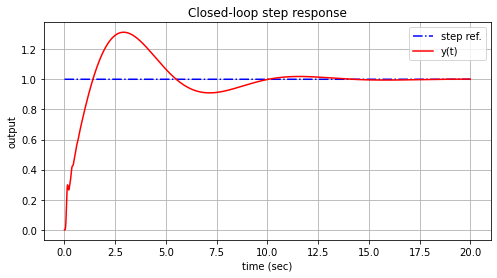

In [9]:
# continuous-time simulation must yield stable feedback system with decent step response.
C_pid_inner = PID(Kp1,Ki1,Kd1,N1)
L_inner = C_pid_inner*P_inner
T_inner = ctl.feedback(L_inner)
C_pid_outer = PID(Kp2,Ki2,Kd2,N2)
P_outer = 1/s
L_outer = C_pid_outer*T_inner*P_outer
T_outer = ctl.minreal(ctl.feedback(L_outer))
tvec = np.arange(0,20,0.001)
tv, y = ctl.step_response(T_outer,tvec)
r = np.ones(tv.shape)
plt.figure(figsize=(8,4))
plt.plot(tv,r,'b-.',tv,y,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y(t)'])
plt.title('Closed-loop step response')
plt.show()

***

**Your work below** : Discretize the PIDs and plant, then form a loop for discrete-time simulation. 
Compare step response with the continuous-time system.